In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from viewer.viewer_src import *
from datasets.datasets import DatasetCenter
from utils.montages import full_referential_montage, full_bipolar_montage

SyntaxError: positional argument follows keyword argument (viewer_src.py, line 90)

In [ ]:
path_data = DatasetCenter().path_data
montage_module = init_montage_module(montages= [full_bipolar_montage])

In [ ]:
def load_and_cut_signal(path_signal,Fq,start,end):
    signal = np.load(path_signal)
    signal=signal[:,start*Fq:end*Fq]
    return signal

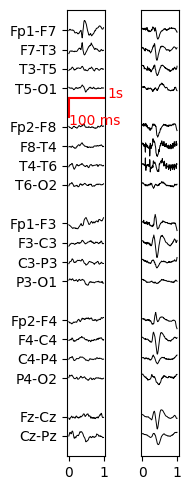

In [ ]:

Fq = 128
start, end = 7,8
files = ['Bonobo00346_1_191211.npy','Bonobo00653_0_18046.npy']
path_signals = [os.path.join(path_data,f) for f in files]

fig, axs = plt.subplots(1,2,figsize = (2,5))
viewer_modules = []
for i, path_signal in enumerate(path_signals):
    ax = axs[i]
    signal = load_and_cut_signal(path_signal)
    y_labels=montage_module.montages[0].y_labels
    y_locations=montage_module.montages[0].y_locations
    viewer_module = init_viewer_module(ax,y_locations,y_labels,x_start=0,x_end=1,Fq=Fq)
    viewer_modules.append(viewer_module)
    signal = montage_module.montages[0](signal)
    update_channels_with_signal(signal=signal,
                                channel_lines=viewer_modules[i].channel_lines,
                                y_locations=viewer_modules[i].y_locations) 
ruler = init_measure_module(axs[0],x_start=0,x_end=1,y_start=-350,y_end=-450,x_label='1s',y_label='100 ms',fontsize='small')
axs[1].set_yticks([])
fig.tight_layout()


In [ ]:
ax

<Axes: >